In [44]:
# https://github.com/facebookresearch/hydra/blob/main/examples/jupyter_notebooks/compose_configs_in_notebook.ipynb

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [45]:
import os
from hydra import initialize, initialize_config_module, initialize_config_dir, compose
from omegaconf import OmegaConf

import napari
import dask.array as da
import napari
from squidpy.im import (
    segment,
    ImageContainer
)

from pathlib import Path


# this file acts as a robust starting point for launching hydra runs and multiruns
# can be run from any place

import hydra
import pyrootutils
from omegaconf import DictConfig

from napari_sparrow import utils
log = utils.get_pylogger(__name__)

# project root setup
# searches for root indicators in parent dirs, like ".git", "pyproject.toml", etc.
# sets PROJECT_ROOT environment variable (used in `configs/paths/default.yaml`)
# loads environment variables from ".env" if exists
# adds root dir to the PYTHONPATH (so this file can be run from any place)
# https://github.com/ashleve/pyrootutils
root = pyrootutils.setup_root(os.getcwd(), dotenv=True, pythonpath=True)

In [46]:
abs_config_dir=os.path.abspath(root / "configs")
with initialize_config_dir(version_base=None, config_dir=abs_config_dir):
    cfg = compose(config_name="segment", overrides=["+dataset=vizgen"])
print(OmegaConf.to_yaml(cfg))

subset: []
task_name: segment
tags:
- dev
dataset:
  data_dir: ${paths.data_dir}/vizgen/
  dtype: zarr
  image: ${dataset.data_dir}/all_1_000.zarr
  coords: null
segmentation:
  method: watershed
paths:
  root_dir: ${oc.env:PROJECT_ROOT}
  data_dir: ${paths.root_dir}/data/
  log_dir: ${paths.root_dir}/logs/
  output_dir: ${hydra:runtime.output_dir}
  work_dir: ${hydra:runtime.cwd}
  masks: null
extras:
  ignore_warnings: false
  enforce_tags: true
  print_config: true



In [47]:
import xarray as xr
import dask.array as da

In [48]:
arr = da.from_zarr(cfg.dataset.image)
arr

ArrayNotFoundError: array not found at path %r' ''

In [ ]:
stack = da.stack([
        [arr[i+x] for x in range(7)] for i in range(5)
])
stack

dask.array<stack, shape=(5, 7, 1000, 1000), dtype=uint16, chunksize=(1, 1, 1000, 1000), chunktype=numpy.ndarray>

In [ ]:
xda = xr.DataArray(stack, dims=("c", "z", "x", "y"))
xda

<xarray.DataArray 'stack-aaf8fe852075e91b4ce76b0927224eaf' (c: 5, z: 7,
                                                            x: 1000, y: 1000)>
dask.array<stack, shape=(5, 7, 1000, 1000), dtype=uint16, chunksize=(1, 1, 1000, 1000), chunktype=numpy.ndarray>
Dimensions without coordinates: c, z, x, y

In [ ]:
ic = ImageContainer(img=xda)
ic

ImageContainer[shape=(1000, 1000), layers=['image']]

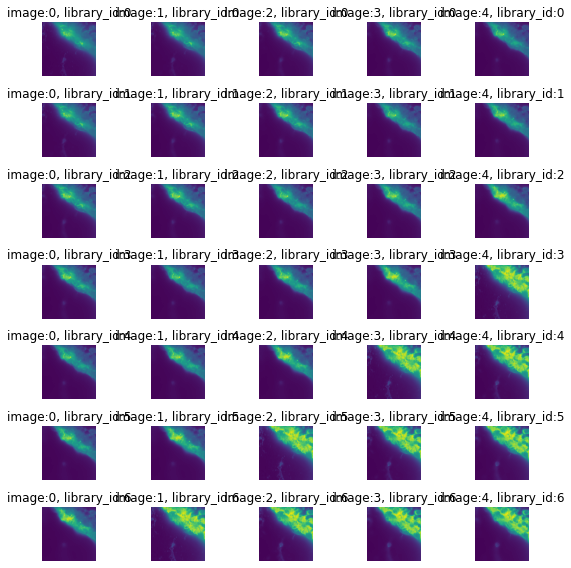

In [ ]:
ic.show('image')

In [55]:
ic.save(cfg.dataset.data_dir)

In [56]:
ic.load(cfg.dataset.data_dir) 

ImageContainer[shape=(1000, 1000), layers=['image']]